# Predict Heart Disease Status Based on Quantifiable Variables

# Introduction:

Cardiovascular diseases (CVDs) is a class of disease that involves the heart or blood vessels. the number one cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of five CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

We are trying to predict the heart disease status based on quantifiable variables such as age, sex, cholesterol level, resting blood pressure, heart rate and old peak. This dataset contains 11 features that can be used to predict possible heart disease. We picked variables with numerical values that were easy to quantify and standardize. In our final report we intend to do subset/forward selection for our final porject. 

### Attribute Information
 1. Age: years
 3. Cholesterol: (mm/dl)
 4. Oldpeak: (Numeric value measured in depression)
 5. RestingBP: resting blood pressure (mm HG)
 6. MaxHR: maximum heart rate achieved (Numeric value between 60 and 202)
 5. HeartDisease:(1: heart disease, 0: Normal)


In [1]:
library(repr)
library(tidyverse)
library(tidymodels)
library(dplyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:
#: reading the data set
heart_data <- read_csv("heart.csv") %>%
              mutate(HeartDisease = as_factor(HeartDisease))

head(heart_data)

Parsed with column specification:
cols(
  Age = col_double(),
  Sex = col_character(),
  ChestPainType = col_character(),
  RestingBP = col_double(),
  Cholesterol = col_double(),
  FastingBS = col_double(),
  RestingECG = col_character(),
  MaxHR = col_double(),
  ExerciseAngina = col_character(),
  Oldpeak = col_double(),
  ST_Slope = col_character(),
  HeartDisease = col_double()
)



Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<fct>
40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0


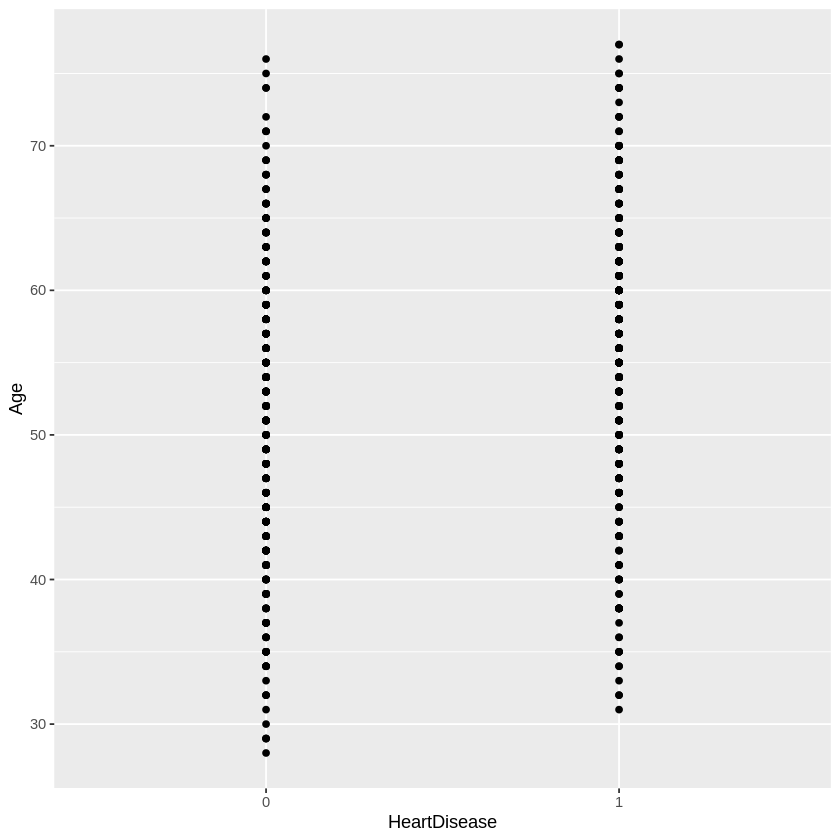

In [3]:
#Age_HeartDisease_plot <- heart_data %>%
#                         ggplot(aes(x = HeartDisease, y = Age)) +
#                         geom_point() +
#                         labs(x = "HeartDisease",  y = "Age")
#Age_HeartDisease_plot     

We tried to use scatter plot to find out the corelation between heartdisease and the 11 variables, but since heartdisese only have 2 numerical values, the graph will be vertical line instead give us a corelation, and it will be the same rest of the variables, in the furture we will use subset/forward selection method to pick the pridictor variables. For now we just choose the variables have the numerical values and it will be easy to quantify and standerdized.

In [4]:
#heart_data_selected <- heart_data %>%
                       select(Age, RestingBP, Cholesterol, MaxHR, Oldpeak, HeartDisease)

#head(heart_data_selected) xxx

Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
40,140,289,172,0.0,0
49,160,180,156,1.0,1
37,130,283,98,0.0,0
48,138,214,108,1.5,1
54,150,195,122,0.0,0
39,120,339,170,0.0,0


In [14]:
heart_split <- initial_split(heart_data_selected, prop = 0.75, strata = HeartDisease)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

In [15]:
#num_obs <- nrow(heart_train)
#heart_sum <- heart_train %>%
#             glimpse() %>%
#             group_by(HeartDisease) %>%
#             summarize(count = n(), percentage = n()/ num_obs* 100)
#heart_sum 

Rows: 689
Columns: 6
$ Age          <dbl> 40, 49, 37, 48, 54, 39, 45, 54, 37, 48, 37, 58, 39, 49, …
$ RestingBP    <dbl> 140, 160, 130, 138, 150, 120, 130, 110, 140, 120, 130, 1…
$ Cholesterol  <dbl> 289, 180, 283, 214, 195, 339, 237, 208, 207, 284, 211, 1…
$ MaxHR        <dbl> 172, 156, 98, 108, 122, 170, 170, 142, 130, 120, 142, 99…
$ Oldpeak      <dbl> 0.0, 1.0, 0.0, 1.5, 0.0, 0.0, 0.0, 0.0, 1.5, 0.0, 0.0, 2…
$ HeartDisease <fct> 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,…


`summarise()` ungrouping output (override with `.groups` argument)



HeartDisease,count,percentage
<fct>,<int>,<dbl>
0,308,44.70247
1,381,55.29753


In [16]:
#check_for_na <- sum(is.na(heart_train))
#check_for_na

[1] 0

In [20]:
#heart_training_recipe <- recipe(HeartDisease ~ Age + RestingBP + Cholesterol + MaxHR + Oldpeak, data = heart_train) %>%
#                         step_scale(all_predictors()) %>%
#                step_center(all_predictors())
#heart_training_recipe

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          5

Operations:

Scaling for all_predictors()
Centering for all_predictors()

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.6821893,5,0.013245649,Model01
3,accuracy,binary,0.7256688,5,0.003863472,Model02
5,accuracy,binary,0.7373372,5,0.010860860,Model03
6,accuracy,binary,0.7373372,5,0.010860860,Model04
7,accuracy,binary,0.7474927,5,0.006698547,Model05
9,accuracy,binary,0.7619439,5,0.008867264,Model06
10,accuracy,binary,0.7619439,5,0.008867264,Model07
12,accuracy,binary,0.7851855,5,0.004454183,Model08
13,accuracy,binary,0.7808271,5,0.005905631,Model09


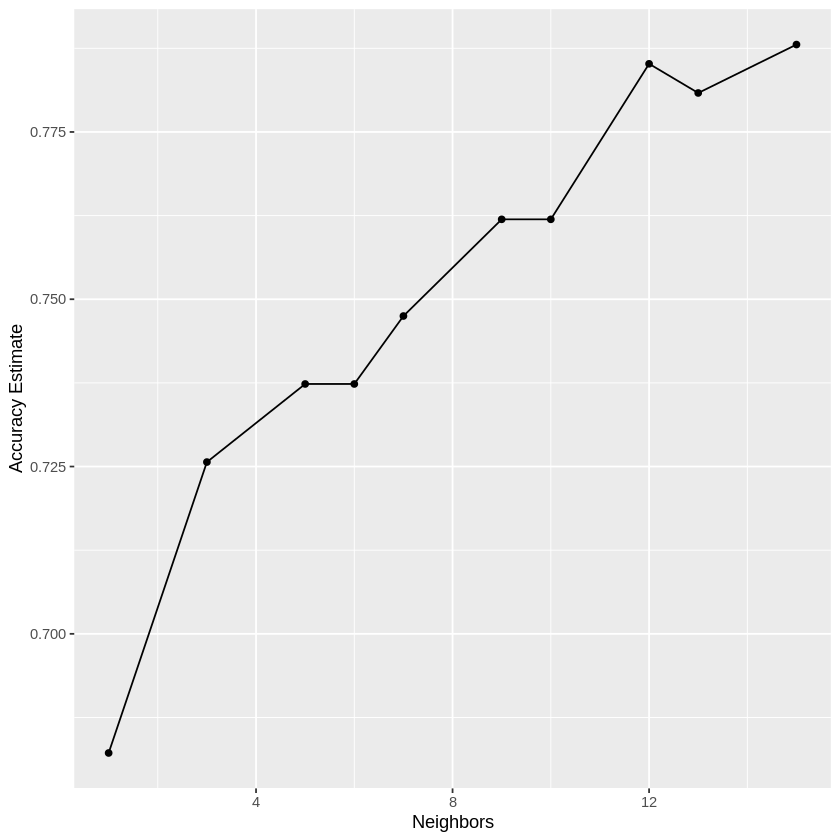

In [26]:
#heart_vfold <- vfold_cv(heart_train, v = 5, strata = HeartDisease)

#knn_heart_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
                  set_engine("kknn") %>%
                  set_mode("classification")

#heart_fit<- workflow() %>%
            add_recipe(heart_training_recipe) %>%
            add_model(knn_heart_tune) %>%
            tune_grid(resamples = heart_vfold, grid = 10) %>%
            collect_metrics()

#accuracies <- heart_fit  %>% 
              filter(.metric == "accuracy")

#cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean))+
                  geom_point() +
                  geom_line() +
                  labs(x = "Neighbors", y = "Accuracy Estimate")  

#accuracies
#cross_val_plot

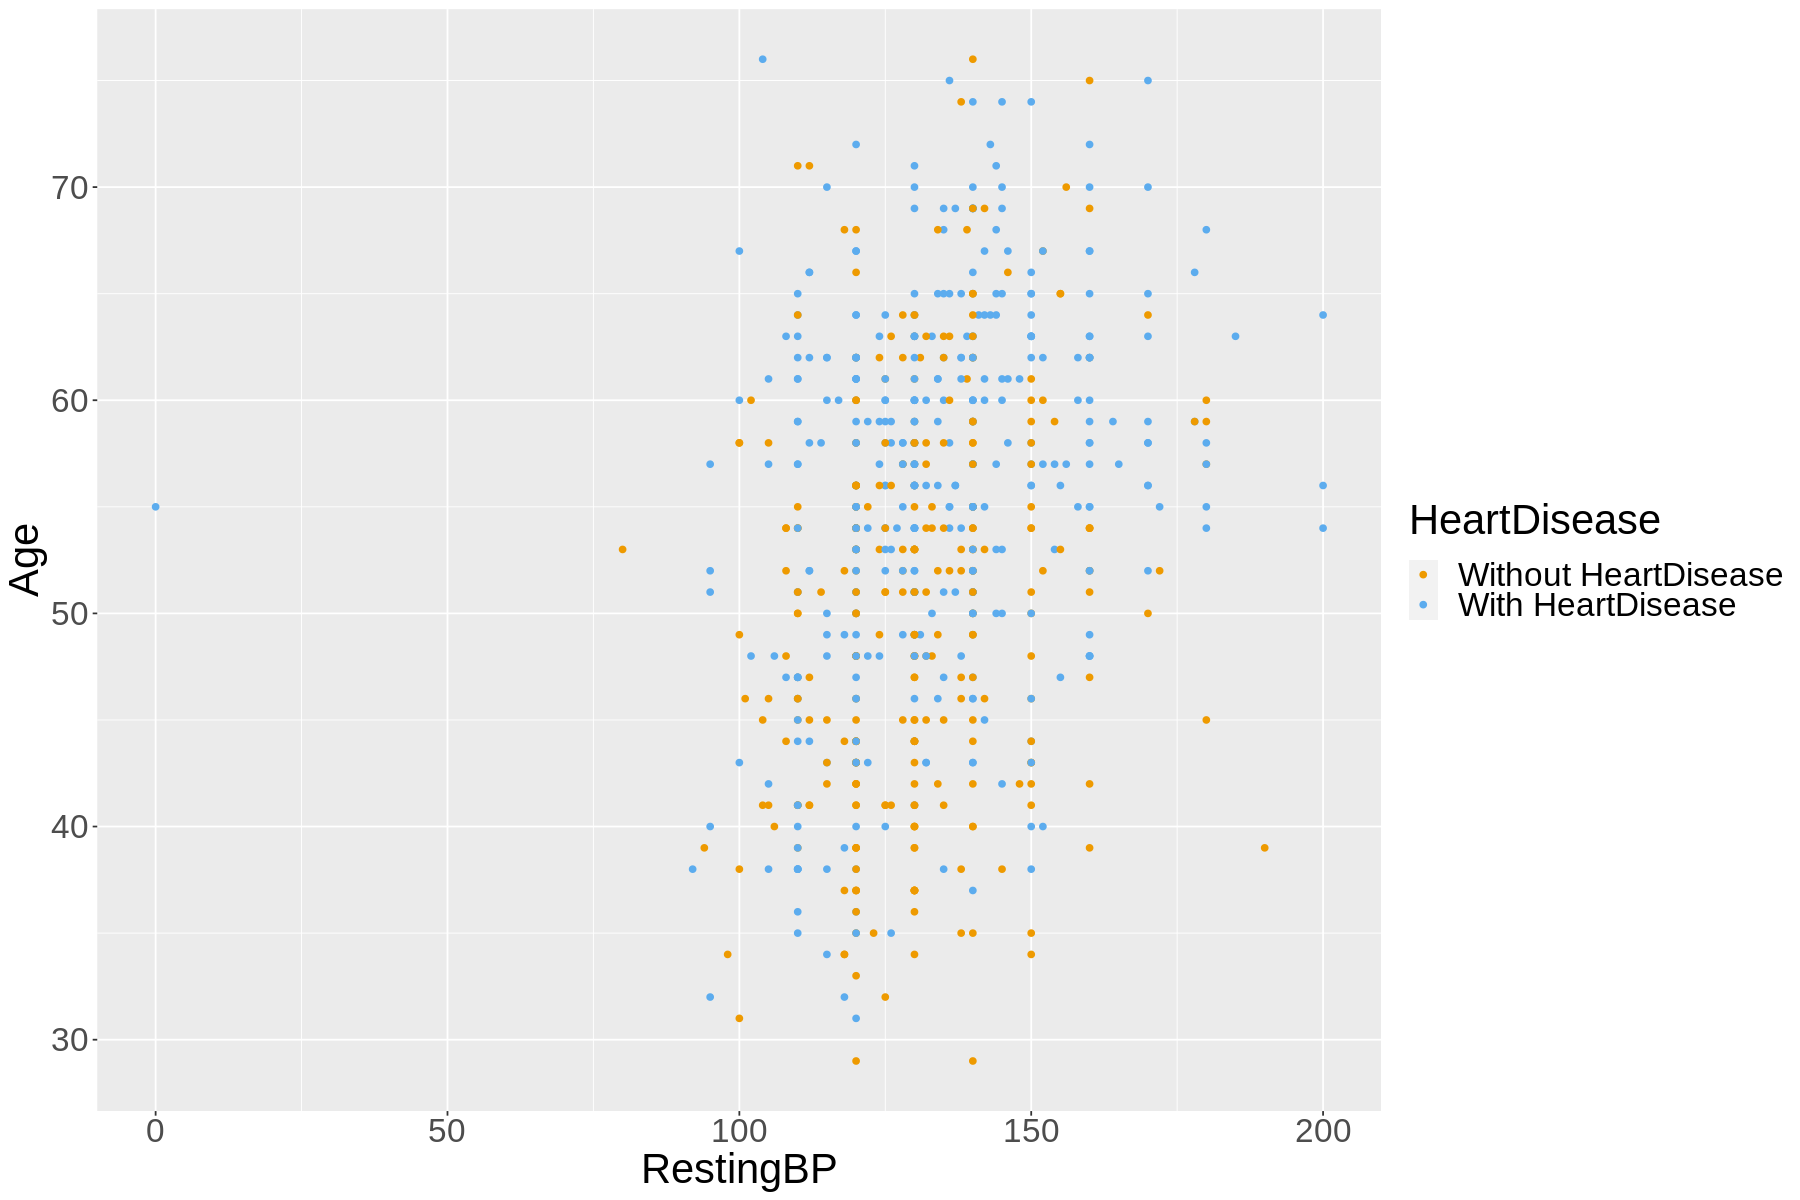

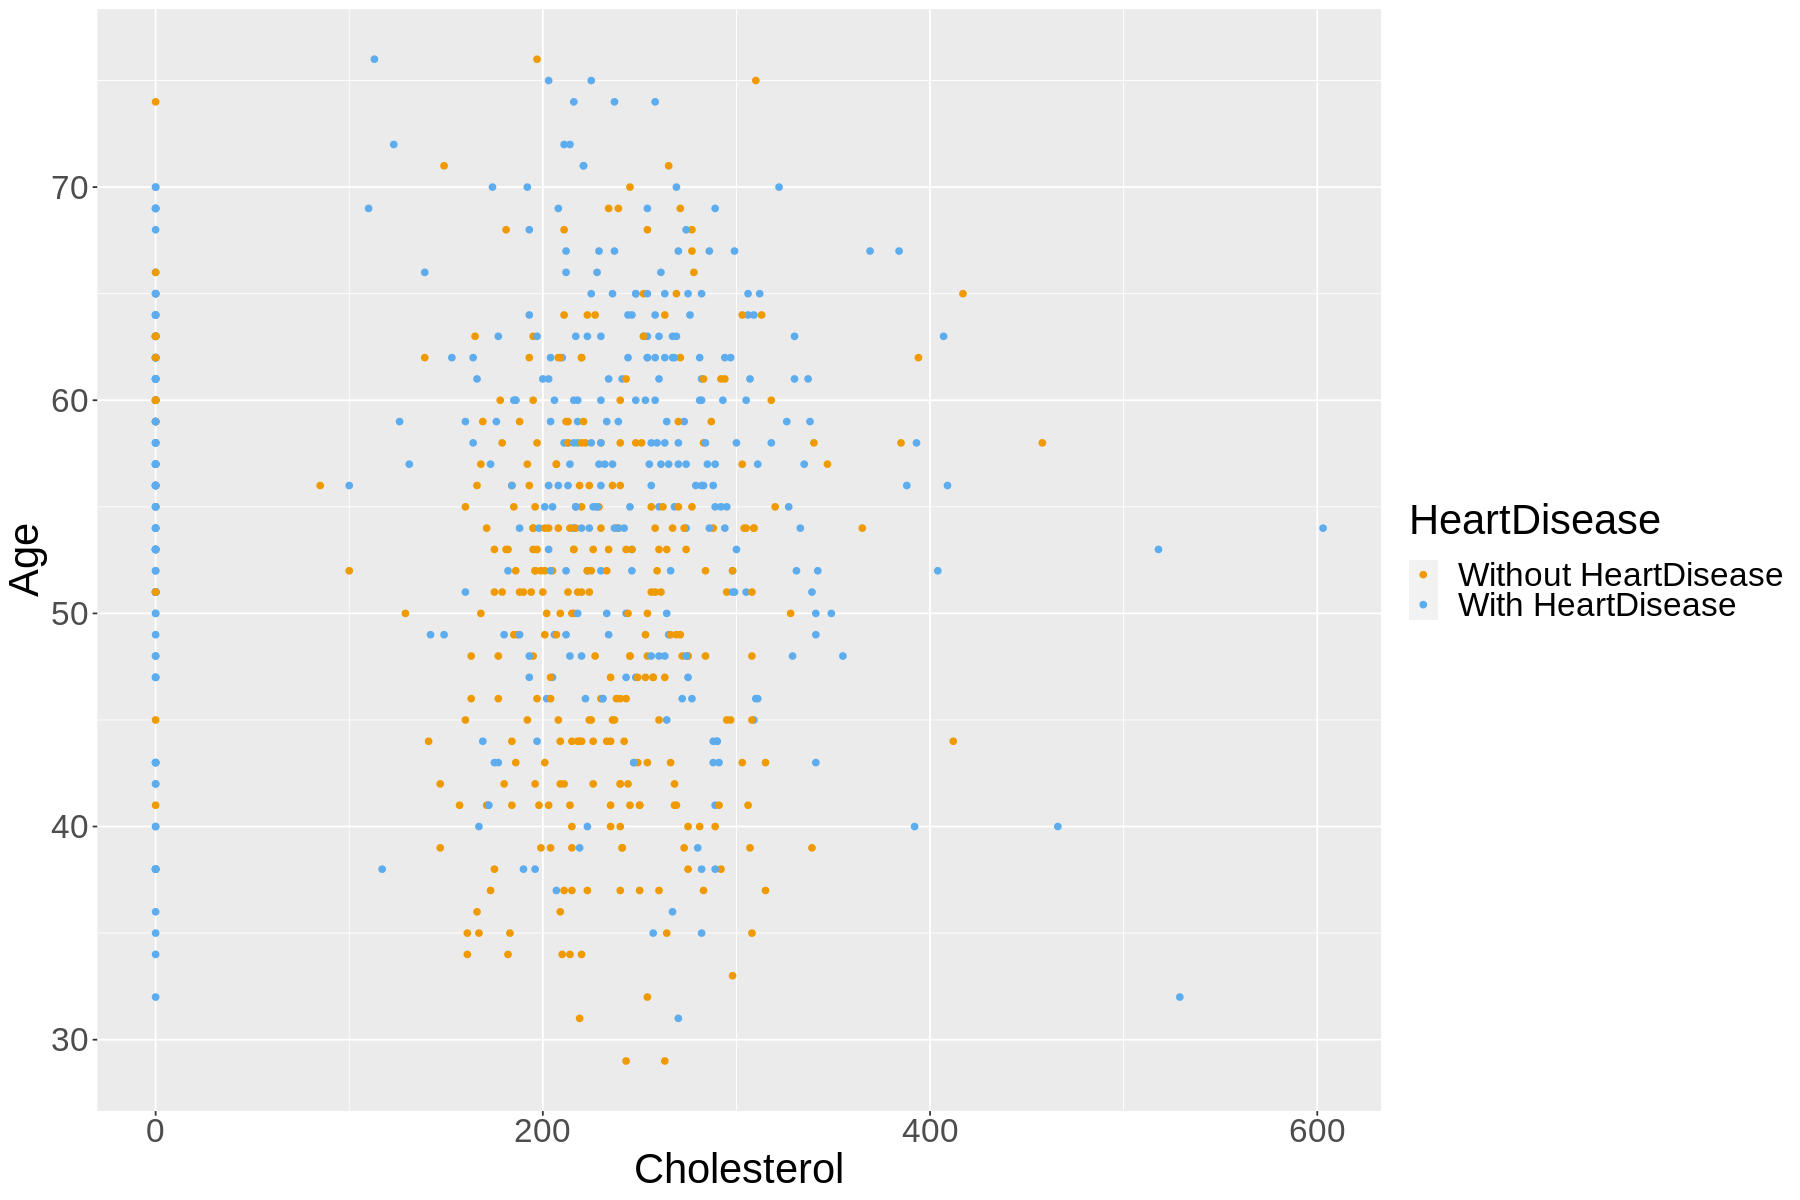

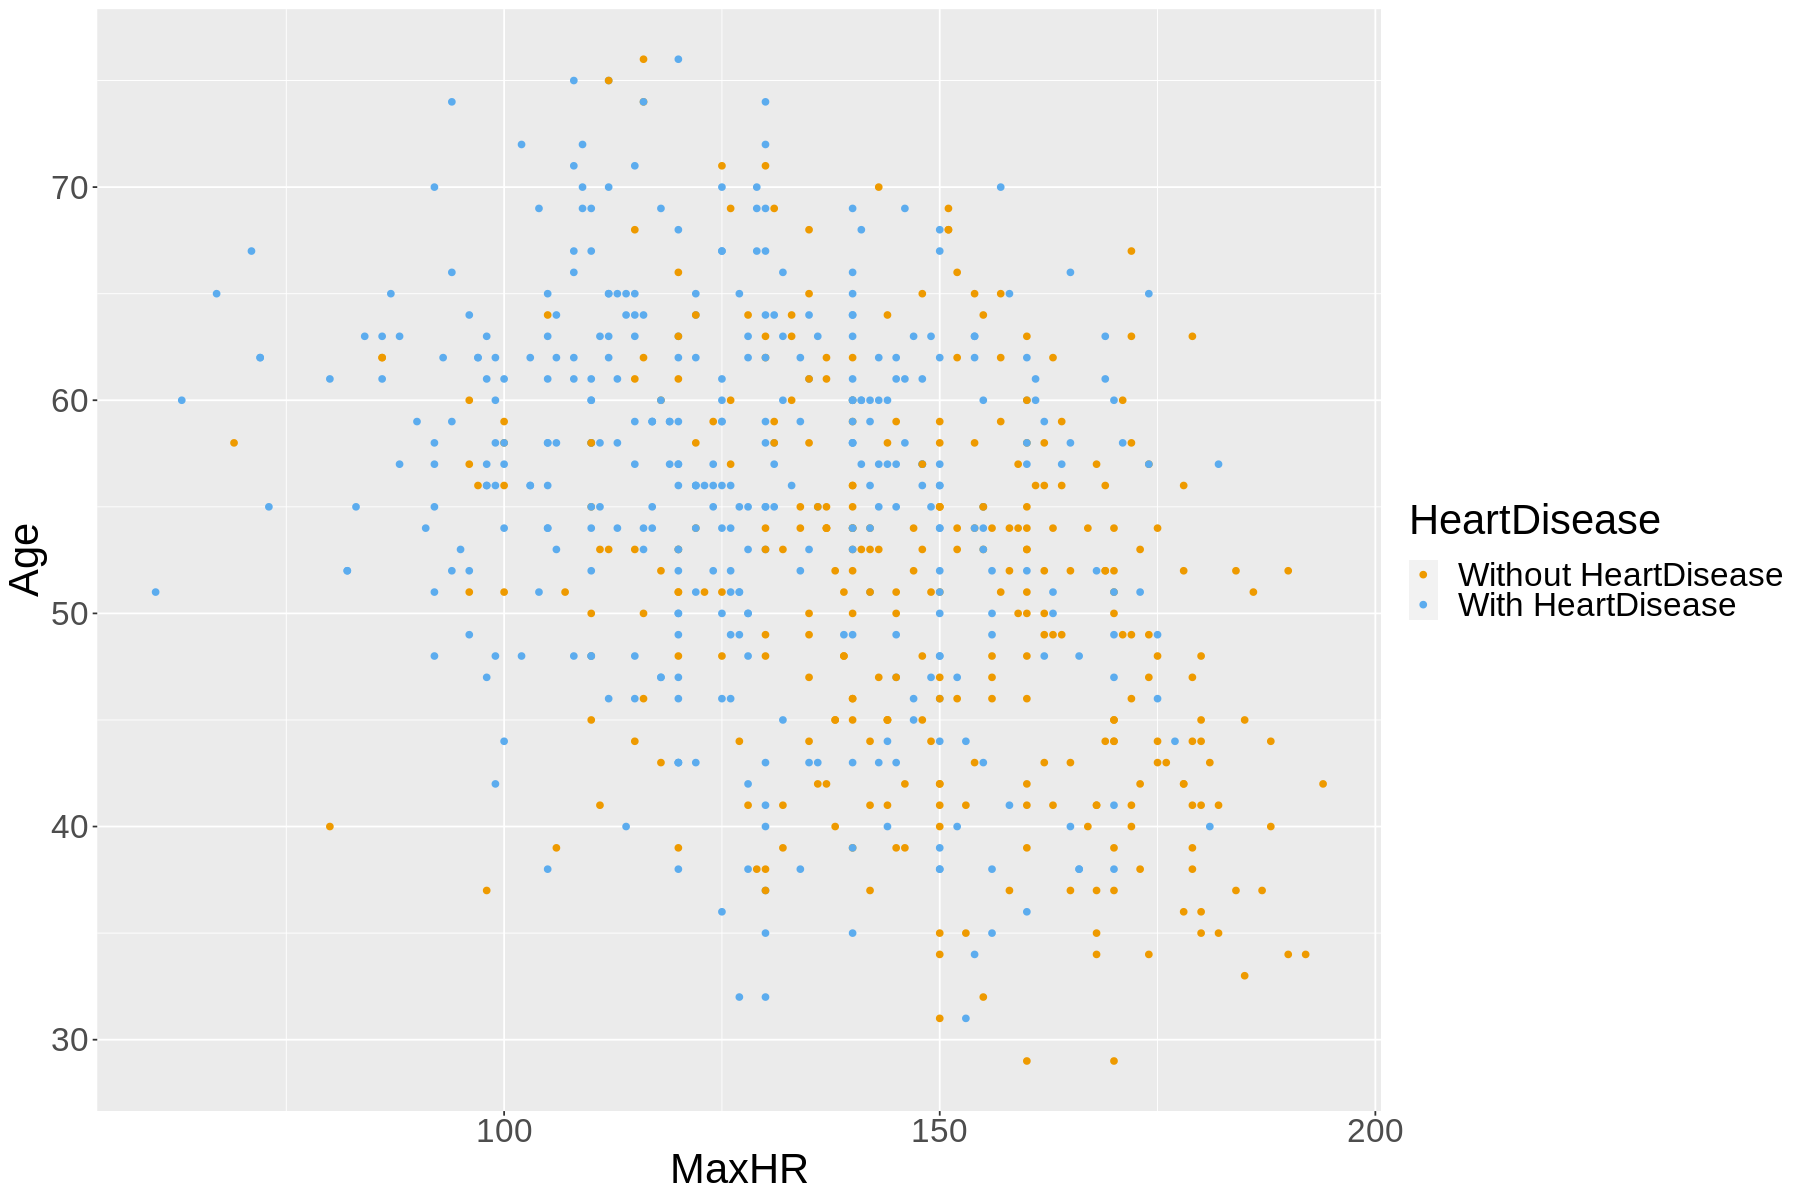

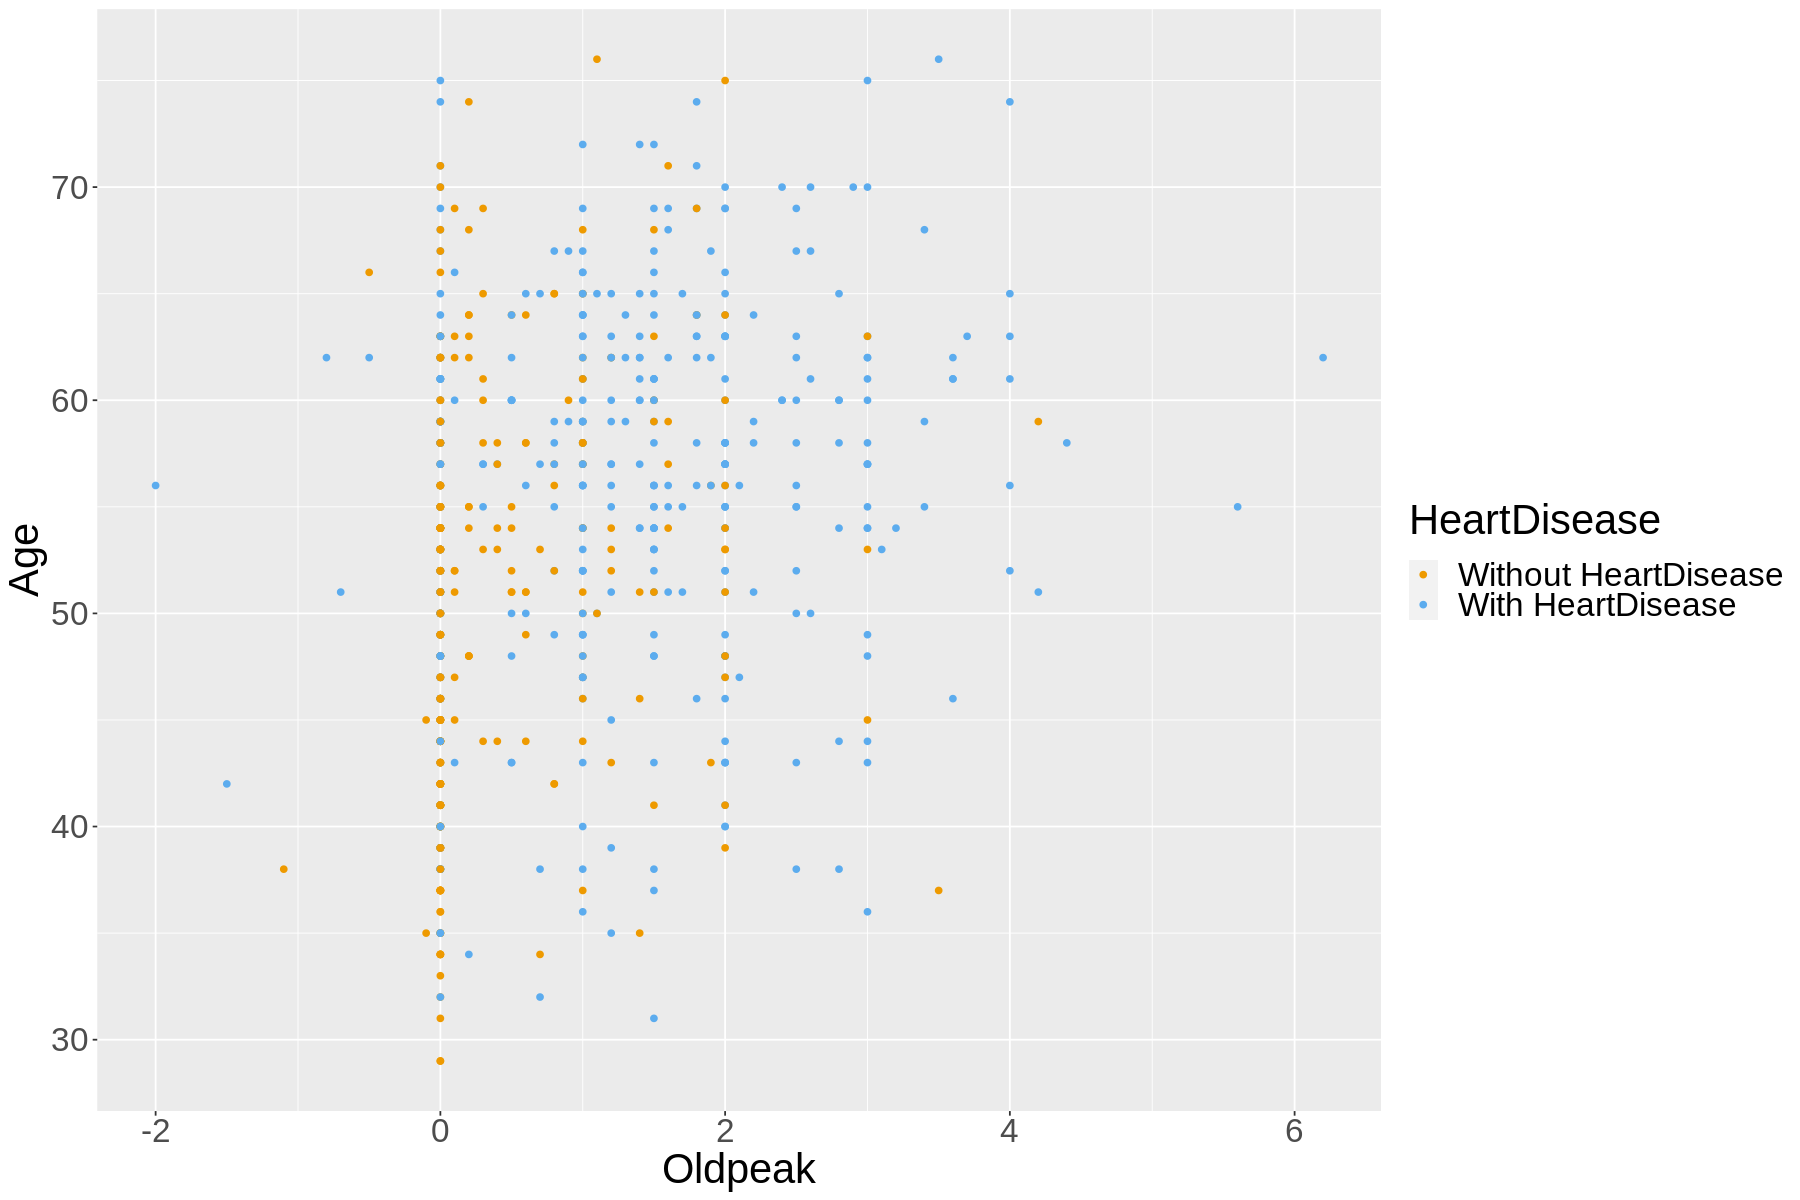

In [41]:
Age_and_RestingBP <- heart_train %>%
                     ggplot(aes(x = RestingBP, y = Age, color = HeartDisease)) +
                     geom_point() +
                     labs(x = "RestingBP",  y = "Age", color = "HeartDisease") +
                     scale_color_manual(labels = c("Without HeartDisease", "With HeartDisease"),
   `                                     values = c("orange2", "steelblue2")) +
                     theme(text = element_text(size = 25))
options(repr.plot.width = 15, repr.plot.height = 10)
                     
Age_and_RestingBP

Age_and_Cholesterol <- heart_train %>%
                       ggplot(aes(x = Cholesterol, y = Age, color = HeartDisease)) +
                       geom_point() +
                       labs(x = "Cholesterol",  y = "Age", color = "HeartDisease") +
                       scale_color_manual(labels = c("Without HeartDisease", "With HeartDisease"),
                                          values = c("orange2", "steelblue2")) +
                       theme(text = element_text(size = 25))
options(repr.plot.width = 15, repr.plot.height = 10)

Age_and_Cholesterol

Age_and_MaxHR <- heart_train %>%
                 ggplot(aes(x = MaxHR, y = Age, color = HeartDisease)) +
                 geom_point() +
                 labs(x = "MaxHR",  y = "Age", color = "HeartDisease") + 
                 scale_color_manual(labels = c("Without HeartDisease", "With HeartDisease"),
                                    values = c("orange2", "steelblue2")) +
                 theme(text = element_text(size = 25))
options(repr.plot.width = 15, repr.plot.height = 10)

Age_and_MaxHR

Age_and_Oldpeak <- heart_train %>%
                 ggplot(aes(x = Oldpeak, y = Age, color = HeartDisease)) +
                 geom_point() +
                 labs(x = "Oldpeak",  y = "Age", color = "HeartDisease") + 
                 scale_color_manual(labels = c("Without HeartDisease", "With HeartDisease"),
                                    values = c("orange2", "steelblue2")) +
                 theme(text = element_text(size = 25))
options(repr.plot.width = 15, repr.plot.height = 10)

Age_and_Oldpeak


